# Infomation:
- Lab 02: Decision Tree with scikit-learn
- ID: 20127102
- Name: Hoang Huu Minh An

### Libary:

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.utils import shuffle
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix
import graphviz 


### Preparing the data sets

In [3]:
db = pd.read_csv('mushrooms.csv')

In [4]:
db.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
db.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
# value counts in output variable
db['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

c:\Program Files\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Program Files\Python31

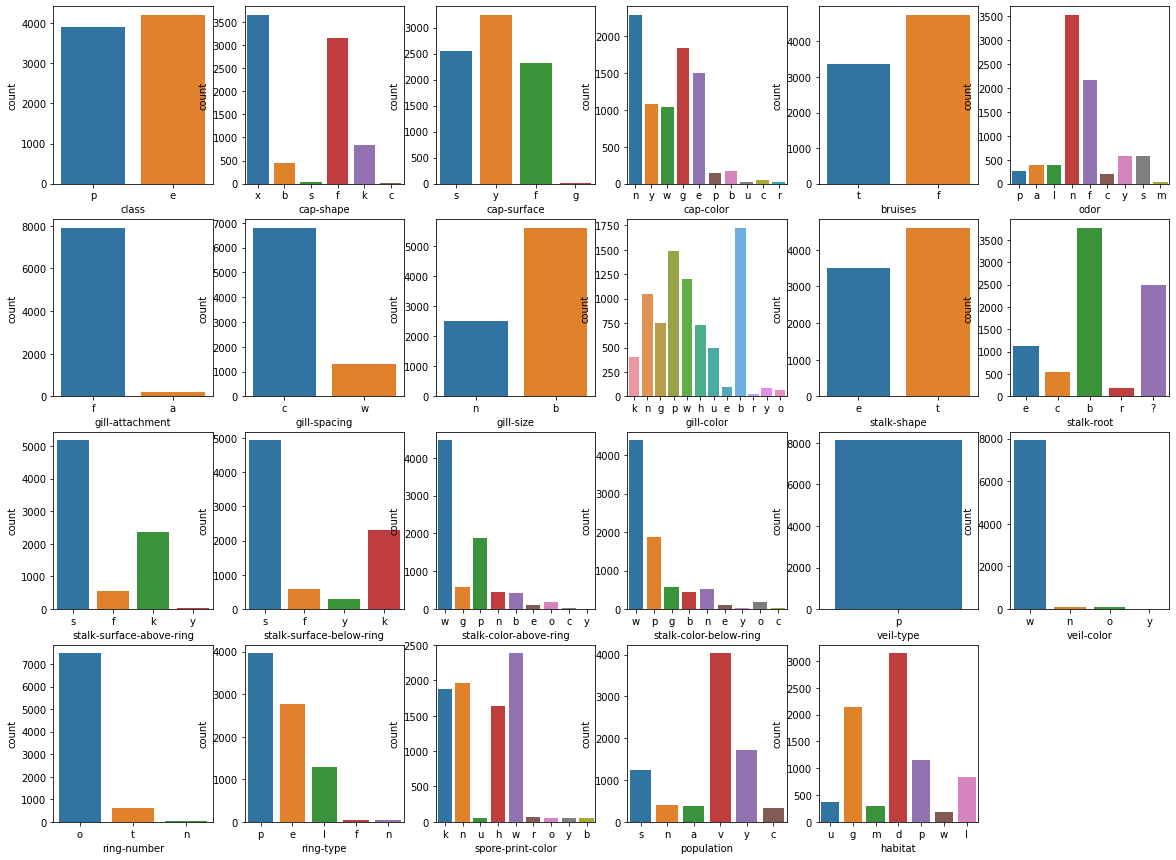

In [7]:
# visualiation of features in data

plt.figure(figsize=(20,15), facecolor='white')
plt_number = 1

for column in db:
    if plt_number <= 23:
        ax = plt.subplot(4,6, plt_number)
        sns.countplot(db[column])
        plt.xlabel(column)

    plt_number += 1

plt.show()

The data is categorial so I convert it with LabelEncoder to transfer to ordinal.

In [8]:
labelencoder=LabelEncoder()
for column in db.columns:
    db[column] = labelencoder.fit_transform(db[column])

In [9]:
db.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [10]:
#From the table above it can be seen that the column "veil-type" is 0 
# and not contributing to the data so I remove it.

db = db.drop(["veil-type"],axis=1)

In [11]:
db.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [12]:
db = shuffle(db)

In [13]:
db

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
798,1,5,2,8,1,6,1,0,1,4,...,2,2,7,7,2,1,4,3,4,1
2959,0,5,0,2,1,5,1,0,0,10,...,2,2,6,3,2,1,4,2,4,0
7810,0,0,0,8,0,5,1,1,0,7,...,2,1,7,7,2,2,4,7,2,1
5452,1,2,3,9,0,2,1,0,0,2,...,1,1,6,6,2,1,2,1,4,4
263,0,5,3,8,1,0,1,0,0,5,...,2,2,7,7,2,1,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5319,1,2,3,9,0,2,1,0,0,2,...,1,1,4,6,2,1,2,1,4,4
107,0,0,3,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,2,3,3
7520,1,3,3,2,0,7,1,0,1,0,...,1,2,6,7,2,1,0,7,4,2
4762,1,5,3,9,0,2,1,0,0,7,...,1,1,0,0,2,1,2,1,5,0


In [14]:
x = db.iloc[:,1:]
y = db.iloc[:,0]


### Mushroom dataset into four subsets

- Training sets and test sets 

In [15]:
# 40/60
feature_train_1, feature_test_1, label_train_1, label_test_1 = train_test_split(x, y,test_size= 0.6)
# 60/40
feature_train_2, feature_test_2, label_train_2, label_test_2 = train_test_split(x, y,test_size= 0.4)
# 80/20
feature_train_3, feature_test_3, label_train_3, label_test_3 = train_test_split(x, y,test_size= 0.2)
# 90/10
feature_train_4, feature_test_4, label_train_4, label_test_4 = train_test_split(x, y,test_size= 0.1)

### Building the decision tree classifiers

In [16]:
def generateTree(x_train, y_train):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(x_train, y_train)
    return clf

In [17]:
def drawTree(x_train, y_train, clf): 
    dot_data = tree.export_graphviz(clf, out_file=None, 
                                    feature_names= x_train.columns,  
                                    class_names= y_train.name,  
                                    filled=True, rounded=True,  
                                    special_characters=True)

    return graphviz.Source(dot_data, format= 'png')


- 40/60
feature_train_1, feature_test_1, label_train_1, label_test_1

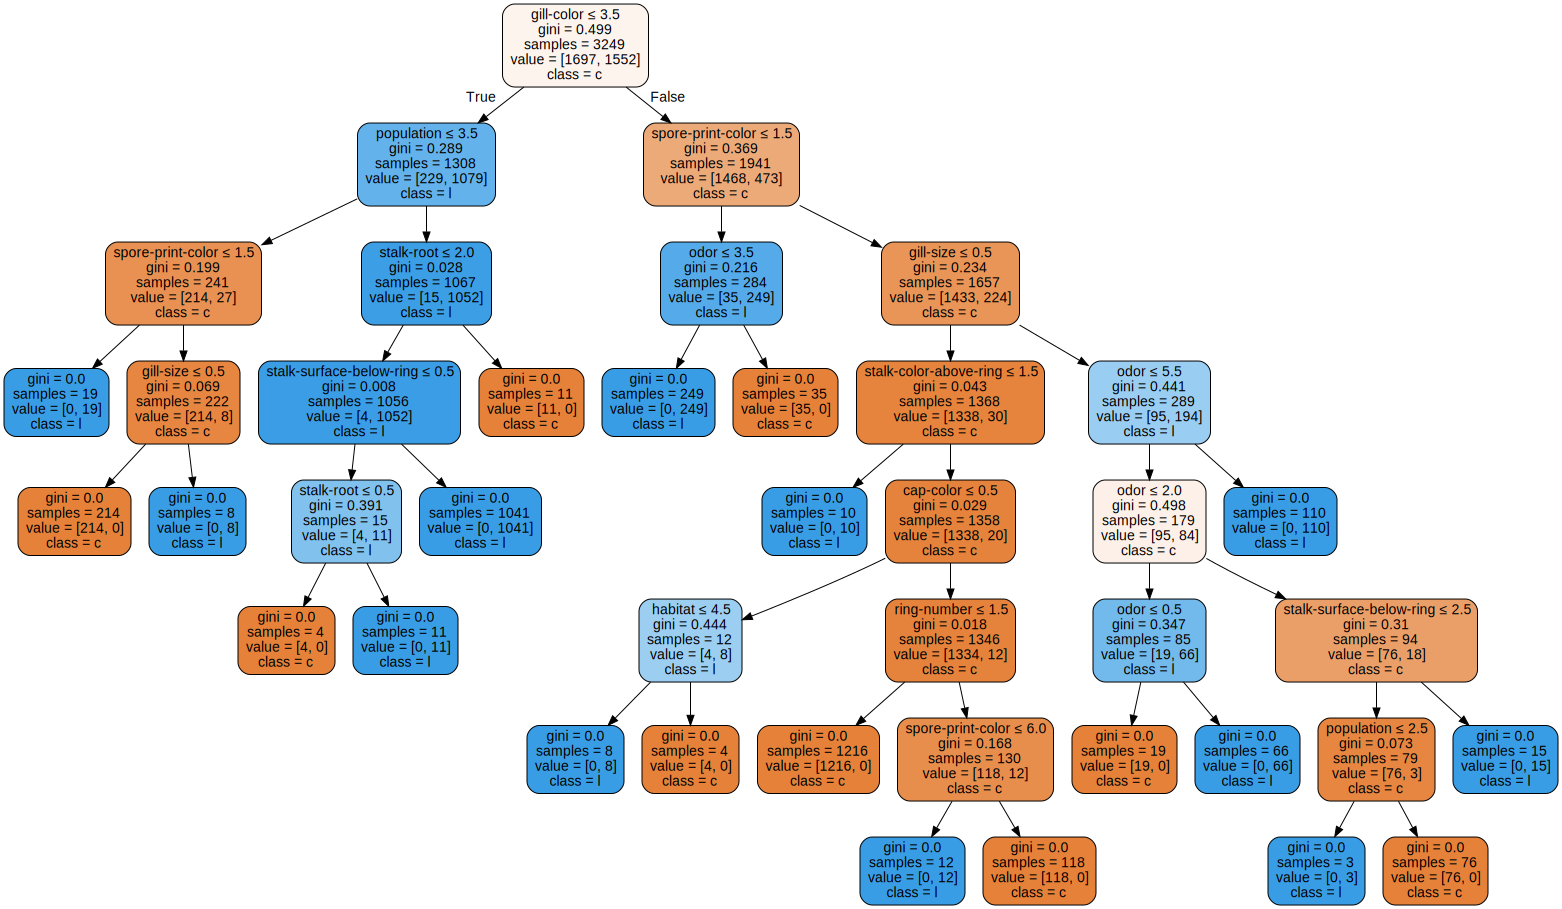

In [18]:
clf = generateTree(feature_train_1, label_train_1)
graph = drawTree(feature_train_1, label_train_1, clf)
graph

- 60/40
feature_train_2, feature_test_2, label_train_2, label_test_2

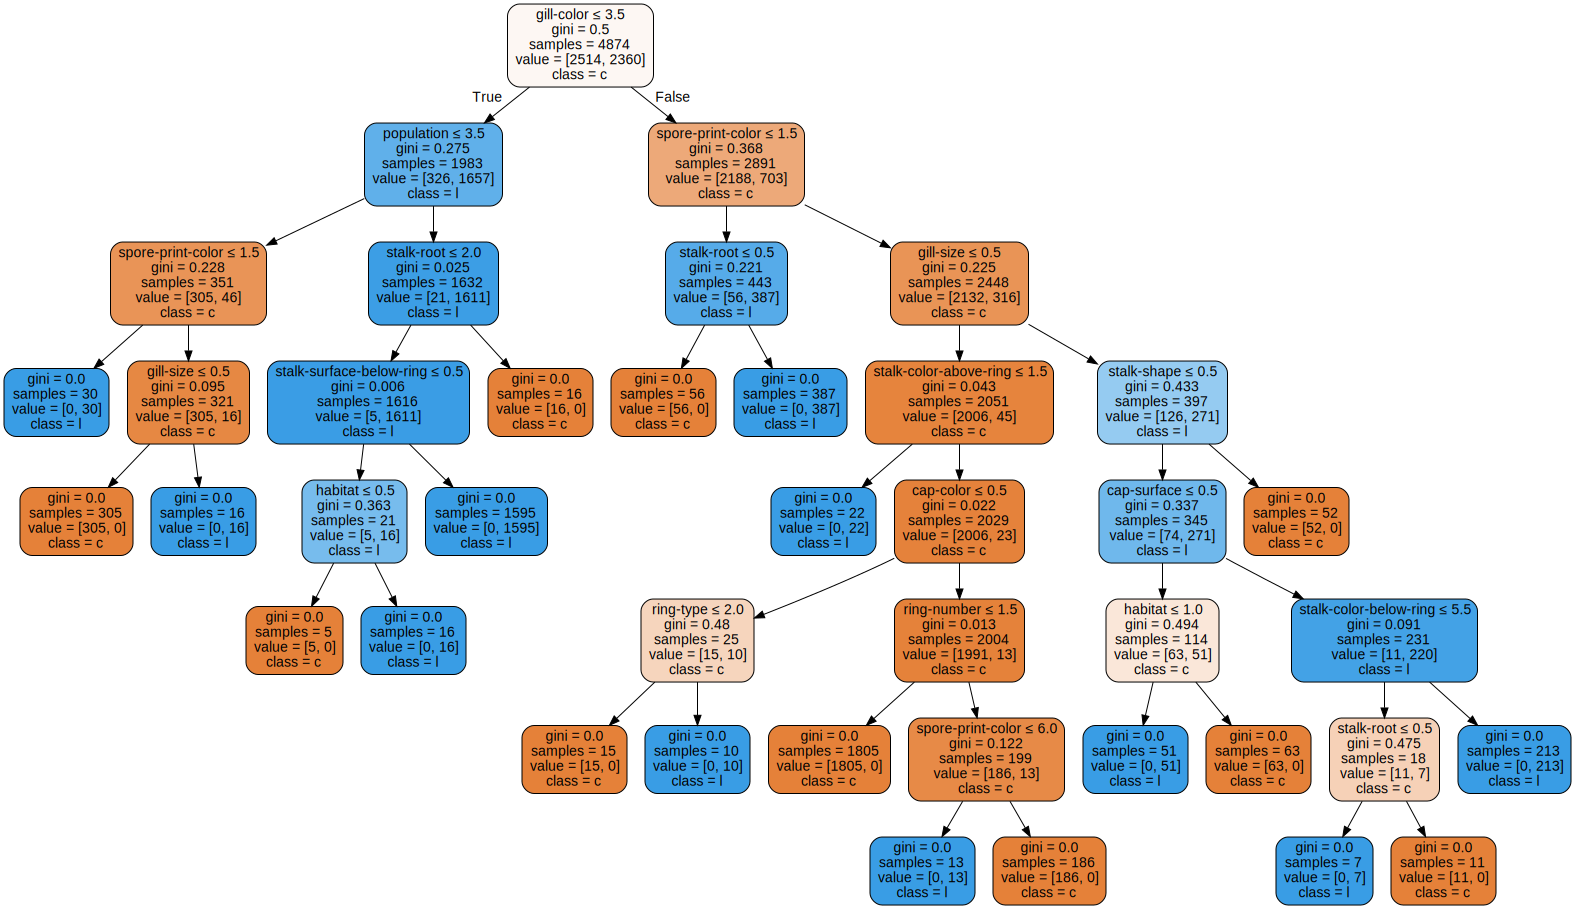

In [19]:
clf = generateTree(feature_train_2, label_train_2)
graph = drawTree(feature_train_2, label_train_2, clf)
graph

- 80/20
feature_train_3, feature_test_3, label_train_3, label_test_3 = train_test_split(x, y,test_size= 0.2)

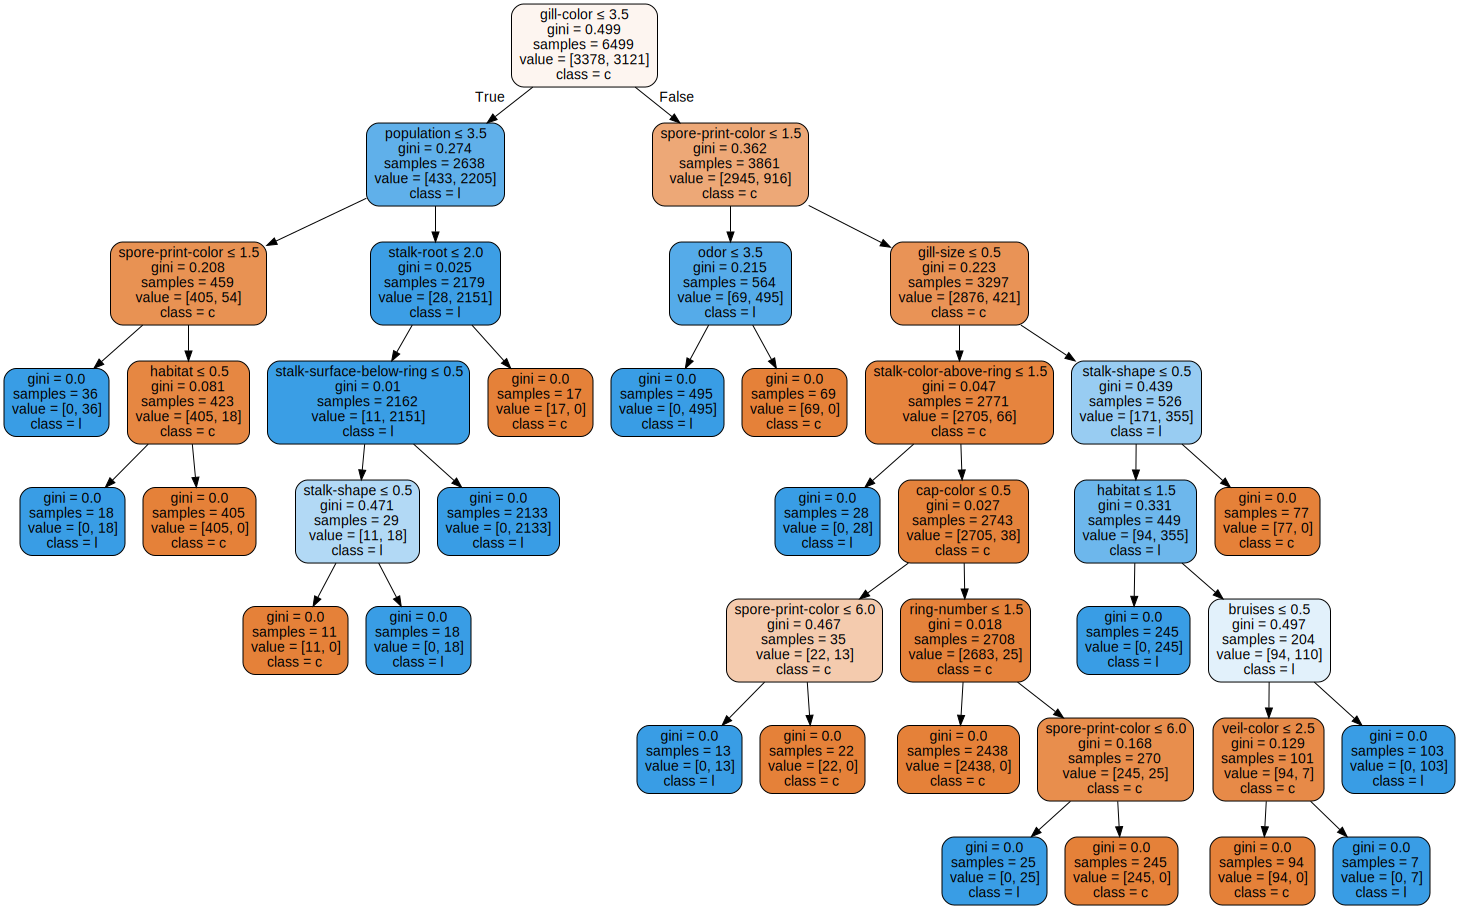

In [20]:
clf = generateTree(feature_train_3, label_train_3)
graph = drawTree(feature_train_3, label_train_3, clf)
graph

- 90/10
feature_train_4, feature_test_4, label_train_4, label_test_4 = train_test_split(x, y,test_size= 0.1)

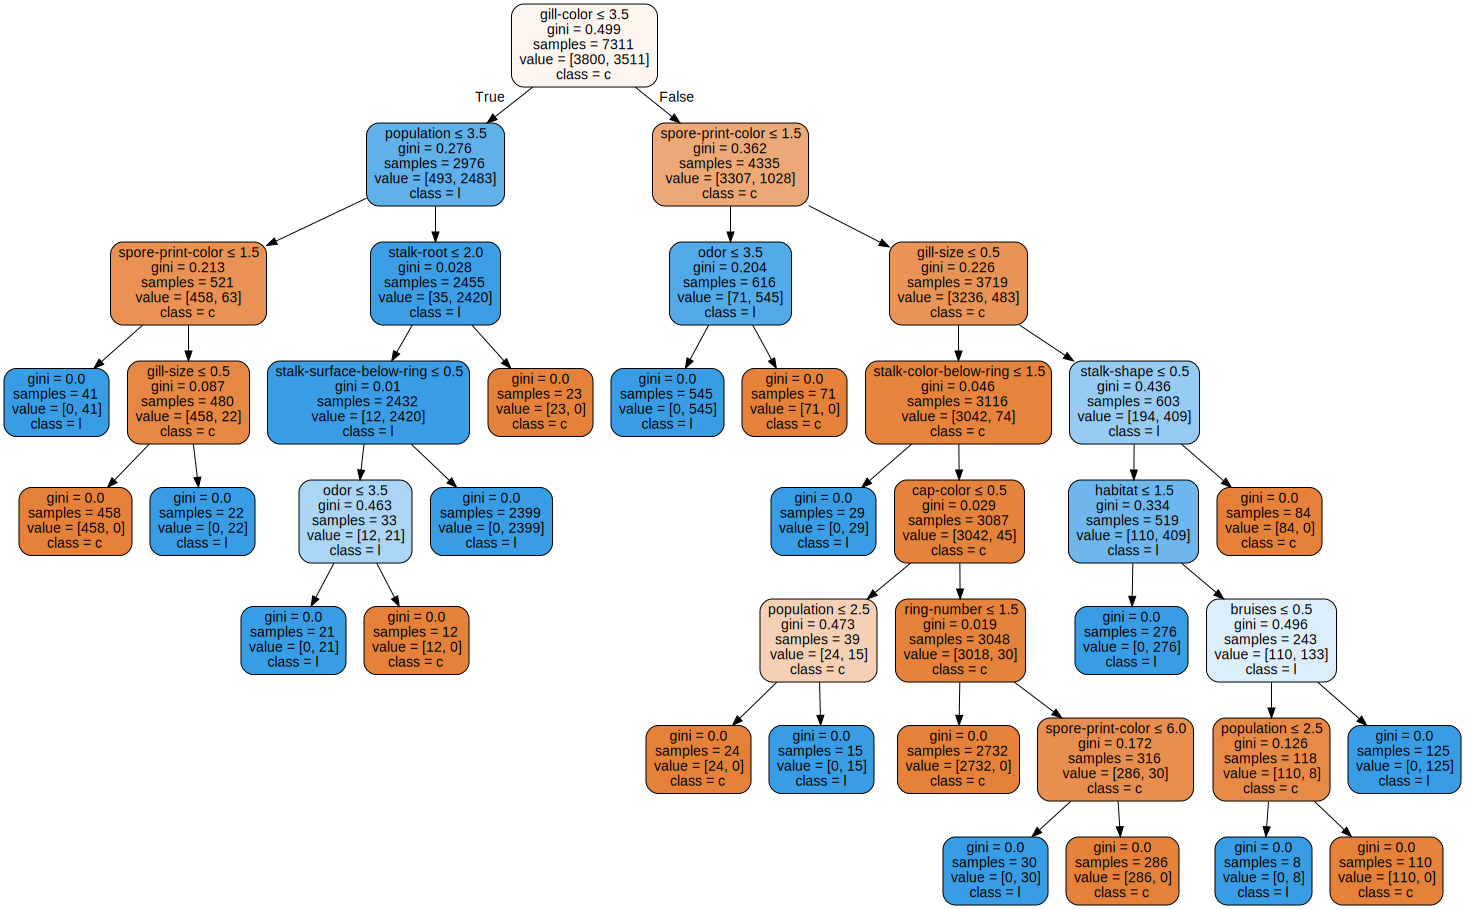

In [21]:
clf = generateTree(feature_train_4, label_train_4)
graph = drawTree(feature_train_4, label_train_4, clf)
graph

### Evaluating the decision tree classifiers

In [22]:
def evaluating(x_test, y_test, clf):
    y_pred = clf.predict(x_test)
    target_names = ['Edible', 'Poison']
    print("Accurary: ", accuracy_score(y_test, y_pred))
    print('----------------------------------------------')
    print("Confusion matrix")
    plot_confusion_matrix(clf, x_test, y_test,
                          display_labels=target_names,
                          cmap= plt.cm.OrRd)
    # cfm = confusion_matrix(y_test, y_pred)
    # sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
    # plt.title('Decision Tree Classifier confusion matrix')
    # plt.ylabel('True label')
    # plt.xlabel('Predicted label')
    plt.show()
    print("Decision Tree Classifier report \n", classification_report(y_test, y_pred))
    print('-----------------------------------------------')
    print('AUC Score: ', roc_auc_score(y_test, y_pred))

    


- 40/60
feature_train_1, feature_test_1, label_train_1, label_test_1

Accurary:  1.0
----------------------------------------------
Confusion matrix


c:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


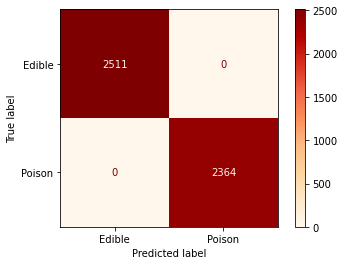

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00      2364

    accuracy                           1.00      4875
   macro avg       1.00      1.00      1.00      4875
weighted avg       1.00      1.00      1.00      4875

-----------------------------------------------
AUC Score:  1.0


In [23]:
clf = generateTree(feature_train_1, label_train_1)
evaluating(feature_test_1, label_test_1, clf)

- 60/40
feature_train_2, feature_test_2, label_train_2, label_test_2

Accurary:  1.0
----------------------------------------------
Confusion matrix


c:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


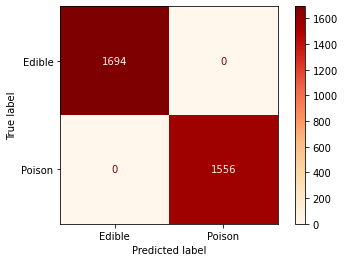

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1694
           1       1.00      1.00      1.00      1556

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250

-----------------------------------------------
AUC Score:  1.0


In [24]:
clf = generateTree(feature_train_2, label_train_2)
evaluating(feature_test_2, label_test_2, clf)

- 80/20
feature_train_3, feature_test_3, label_train_3, label_test_3 = train_test_split(x, y,test_size= 0.2)

Accurary:  1.0
----------------------------------------------
Confusion matrix


c:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


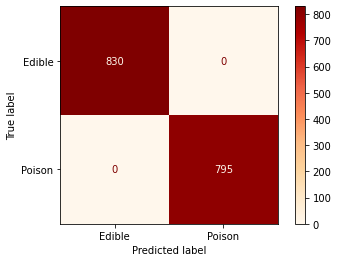

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       830
           1       1.00      1.00      1.00       795

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

-----------------------------------------------
AUC Score:  1.0


In [25]:
clf = generateTree(feature_train_3, label_train_3)
evaluating(feature_test_3, label_test_3, clf)

- 90/10
feature_train_4, feature_test_4, label_train_4, label_test_4

Accurary:  1.0
----------------------------------------------
Confusion matrix


c:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


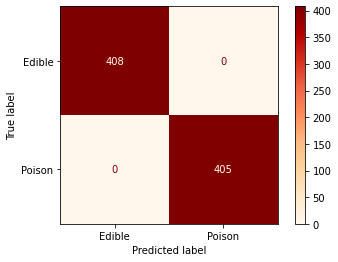

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00       405

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813

-----------------------------------------------
AUC Score:  1.0


In [26]:
clf = generateTree(feature_train_4, label_train_4)
evaluating(feature_test_4, label_test_4, clf)

-	They are some of the mostly used measures in evaluating how good your system works.
-	Precision: It is calculated with respect to the predicted values. For class-A, out of total predictions how many were really belong to class-A in actual dataset, is defined as the precision. It is the ratio of [i][i] cell of confusion matrix and sum of the [i] column.
-	Recall: It is calculated with respect to the actual values in dataset. For class-A, out of total entries in dataset, how many were actually classified in class-A by the ML model, is defined as the recall. It is the ratio of [i][i] cell of confusion matrix and sum of the [i] row.
-	F1-score: It is the harmonic mean of precision and recall.
-	Support: It is the total entries of each class in the actual dataset. It is simply the sum of rows for every class-i


### The depth and accuracy of a decision tree

- 80/20 training set and test set is: feature_train_3, feature_test_3, label_train_3, label_test_3

In [27]:
max_depth = [2, 3, 4, 5, 6, 7]

depth:  7


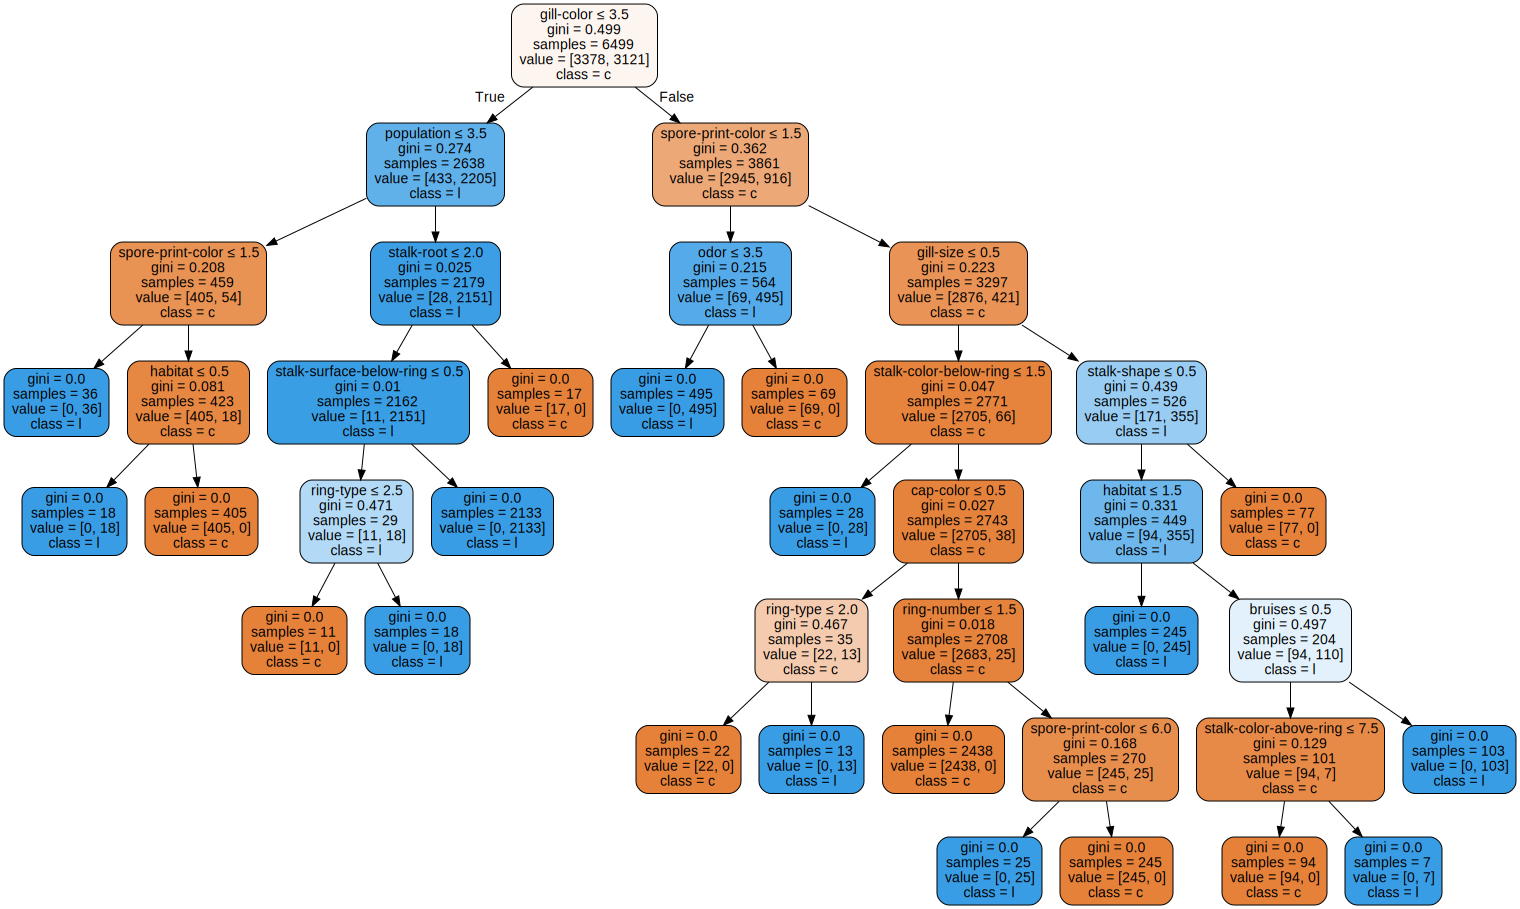

In [34]:
i = 5
print("depth: ", max_depth[i])
clf = tree.DecisionTreeClassifier(max_depth= max_depth[i])
clf = clf.fit(feature_train_3, label_train_3)

drawTree(feature_train_3, label_train_3, clf)

Accurary:  0.9064615384615384
----------------------------------------------
Confusion matrix


c:\Program Files\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


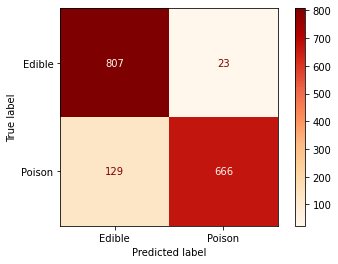

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       830
           1       0.97      0.84      0.90       795

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

-----------------------------------------------
AUC Score:  0.905012502841555


In [29]:
evaluating(feature_test_3, label_test_3, clf)

- Comment: Length max tell me how deep can the tree be so when there is one node 
           when there is one decision that's depth ones so when you make the decision
           or when there's only one node then that's a depth of one when you have a
           decision node there and then you split.
           Sometimes decision trees can grow to be very long so if you wanted something
           these things are not really things that you can.